<a href="https://colab.research.google.com/github/sfirdous/data-science/blob/main/ML/LinearModels/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt

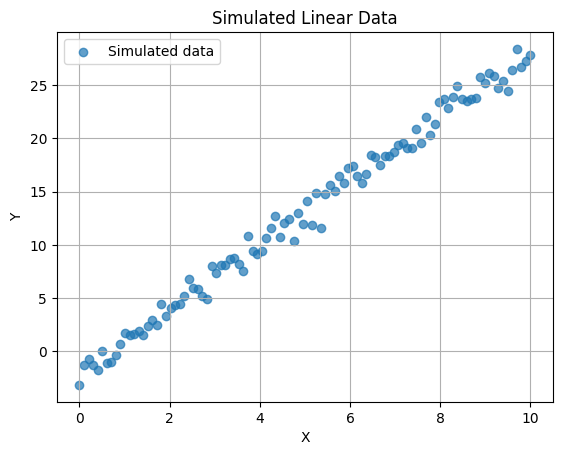

In [2]:
torch.manual_seed(50)

N = 100
w = 3
b = -2
noise_std = 1

#generate input feature X
X = torch.linspace(0,10,N).unsqueeze(1)  #changes the dimension of X

#generates a tensor of shape (N, 1)
#this scales the noise, changing its standard deviation from 1 to noise_std.
noise = torch.randn(N,1)*noise_std

y = w*X + b + noise

plt.scatter(X.numpy(),y.numpy(),label = 'Simulated data', alpha = 0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulated Linear Data')
plt.grid(True)
plt.legend()
plt.show()





